In [14]:
import darklyrics
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from collections import Counter

### Informe nas variáveis o nome da banda que deseja estudar

In [96]:
artist = "iron maiden"

## Retorna os álbuns da banda

In [97]:
try:
    albuns = darklyrics.get_albums(artist)

except IndexError:
    raise IndexError("Artista não encontrado")

In [98]:
print(f"{artist} tem {len(albuns)} discos encontrados")

iron maiden tem 28 discos encontrados


### Retorne o nome das músicas

In [99]:
songs = darklyrics.get_songs(artist)

In [100]:
print(f"{artist} tem {len(songs)} músicas encontradas")

iron maiden tem 208 músicas encontradas


### Remove nome de músicas duplicadas

In [101]:
songs = set(songs)

In [102]:
print(f"{artist} tem {len(songs)} músicas distintas encontradas")

iron maiden tem 197 músicas distintas encontradas


### Retorna todas músicas da banda

In [103]:
lyrics = darklyrics.get_all_lyrics(artist)

In [104]:
print(f"{artist} tem {len(lyrics)} letras encontradas")

iron maiden tem 258445 letras encontradas


In [105]:
lyrics[:100]

"\n  [Steve Harris]\n\n Walking through the city, looking oh so pretty,\n I've just got to find my way.\n "

In [106]:
lyrics = lyrics.replace("\n\n", " ").replace("\n", " ").strip()

In [94]:
print(f"{artist} tem {len(lyrics)} letras distintas encontradas")

slayer tem 165722 letras distintas encontradas


### Criar uma nuvem de palavras

In [83]:
stopwords = set(STOPWORDS)

In [84]:
def get_top_most_words(top=10):
    words = []
    
    for val in lyrics.split():
        if val.lower() not in stopwords:
            words.append(val)
    
    group_by_word = Counter(words)
    
    return group_by_word.most_common(top)
    

In [85]:
# informe o valor do parâmetro top na function get_top_most_words para indicar a quantidade de palavras que quer retornar
most_common = get_top_most_words(top=20)

In [86]:
print(most_common)

[('will', 155), ('death', 136), ('life', 121), ('blood', 114), ('-', 108), ('never', 107), ('see', 104), ('way', 87), ('time', 85), ('fucking', 85), ('eyes', 80), ('King]', 79), ('pain', 78), ('die', 77), ('mind', 77), ('one', 75), ('God', 73), ('world', 71), ('dead', 69), ('now', 67)]


In [87]:
def create_word_cloud(words: tuple):
    lyric_words = ""
    
    for val in words:
        val = str(val[0]) 
  
        # split the value
        tokens = val.split() 
      
        # converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        lyric_words += " ".join(tokens)+" "
        
    # gets color of the image
    custom_image = np.array(Image.open("resources/cloud.png"))

    # creates wordcloud
    wordcloud = WordCloud(
        background_color ='white', 
        stopwords = stopwords, 
        mask = custom_image).generate(lyric_words)
    
     # displays the wordcloud
    plt.imshow(wordcloud, interpolation = 'bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()

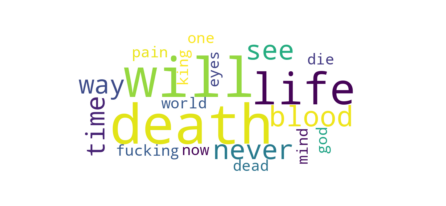

In [88]:
create_word_cloud(most_common)

In [89]:
df = pd.DataFrame(most_common, columns=['word', 'total'])

In [90]:
df.head(20)

,word,total
0,will,155
1,death,136
2,life,121
3,blood,114
4,-,108
5,never,107
6,see,104
7,way,87
8,time,85
9,fucking,85


In [55]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

In [ ]:
%matplotlib inline

my_labels = [d[0] for d in most_common]

ax = df['total'].value_counts().plot(kind='pie', figsize=(30,16), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

### Identificar quem é o membro da banda que mais escreve música

In [ ]:
import re

text_in_brackets = re.findall(r'\[.*?\]', lyrics)
print(text_in_brackets)